## Problem Statement


HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

The objective is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. we need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors.

## Steps that we will follow
1.  Read the Data and Understand Data
2.  Perform EDA
3.  Outlier Treatment
4.  Hopkins Statistics
5.  Scaling -Prepare Data for Modeling
6.  Heirarchical clustering
7.  K means Clustering
8.  Cluster profiling
9.  Conclusion

## 1. Read the Data and Understand Data

In [1]:
# Import the basic libraries as numpy and pandas 
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import the data (the appropriate location should be used), check the top 5 from the dataframe .
CountryDf = pd.read_csv(r"D:\Data Science\Study material\UpGrad\Clustering\Assignment\Country-data.csv")
CountryDf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
## Import the data dictionary for reference
DataDictDf=pd.read_csv(r"D:\Data Science\Study material\UpGrad\Clustering\Assignment\data-dictionary+.csv")
DataDictDf

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


as we can see from the data dictionary exports,health,imports are given as % of gdpp we wold need to convert them to their absolute value.

In [4]:
CountryDf['exports'] = CountryDf['exports'] * CountryDf['gdpp']/100 # converting exports
CountryDf['imports'] = CountryDf['imports'] * CountryDf['gdpp']/100 #Converting Imports
CountryDf['health'] = CountryDf['health'] * CountryDf['gdpp']/100 #converrting Health
CountryDf.head() # Check the head

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### 1.1 Inspect the data 

In [5]:
CountryDf.info() ## to understand the data type and not null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
CountryDf.describe() # to understand the distribution

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
CountryDf.shape ## to get the shape of the dataframe 

(167, 10)

#### Inference
- There are no missing values in the dataset

## 2. Perform EDA


## Univariate analysis 

### 2.1 Dist plot for all the neumerical values 
We will do a distribution plot inorder to visualize the distribution of the data 

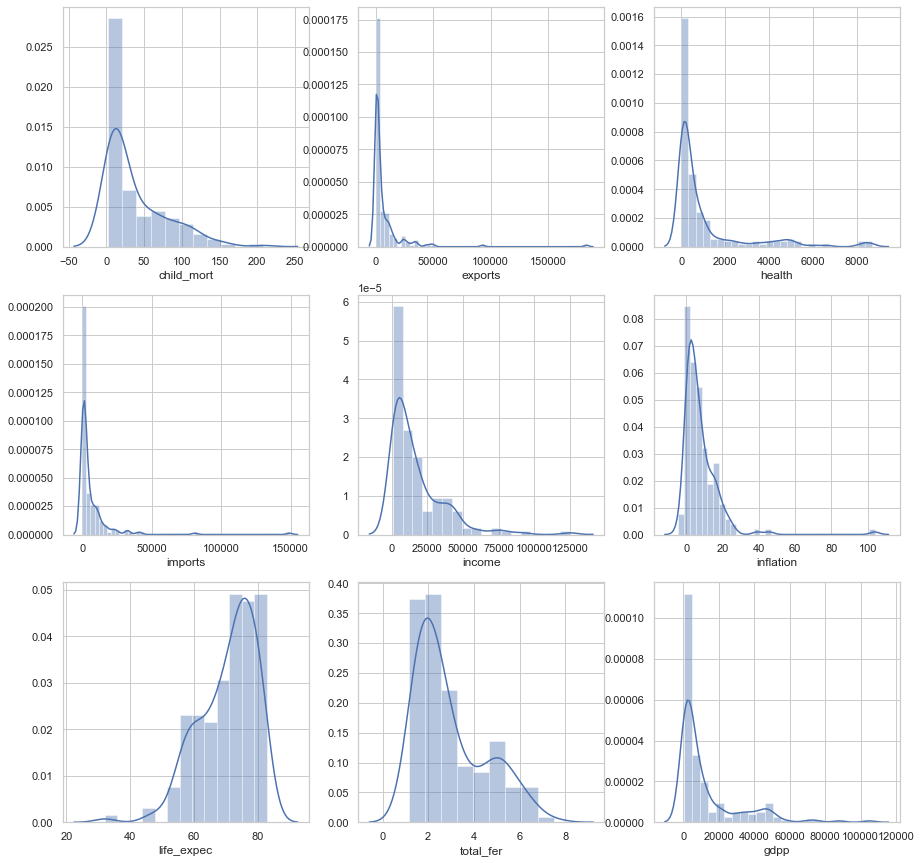

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,15))
feature = CountryDf.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(CountryDf[i[1]])
        

#### Inferences
- Child mortality and export are right skewed distribution. 
- Life expectancy is left skewed .
- Child mortality , Income, total_fertility and GDPP doesnt seem to be following normal distribution  which can be used for cluster profiling later .


### 2.2 Strip Plot
 It is used to visualize the distribution of data points of the variable

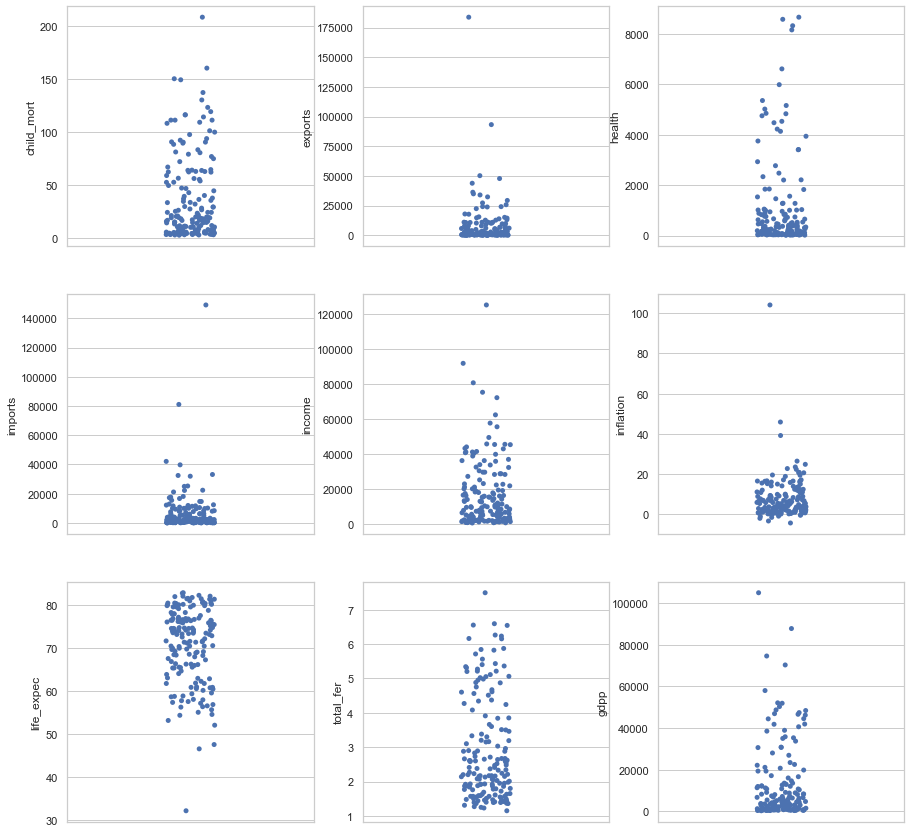

In [9]:
plt.figure(figsize = (15,15))
feature = CountryDf.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.stripplot (y=CountryDf[i[1]])

#### Major Inferences
- Most of the values of Life expectancy is above 50
- GDPP of most of the countries is less than 60000
- Inflation of most of the countries lie below 20 
- Exports of most of the countries is below 50000.

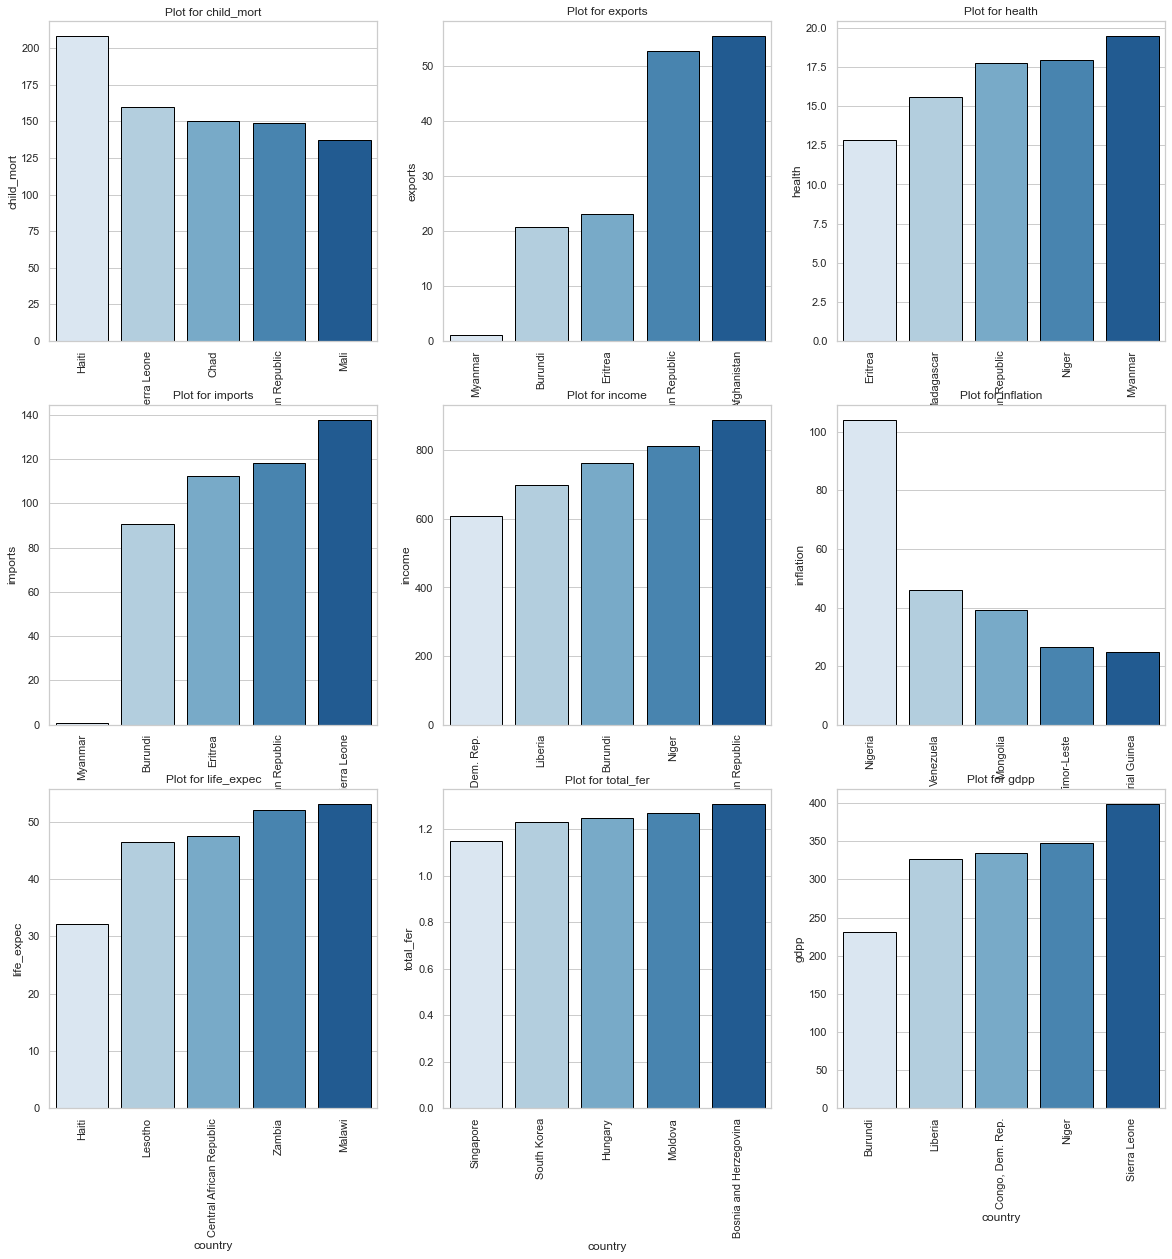

In [10]:
## Top 5 from bottom 
plt.figure(figsize = (20,20))

feature = CountryDf.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    if (i[1]=='child_mort' or i[1]=='inflation' ):
        Y= CountryDf.sort_values(by = [ i[1]], ascending = [False]).head(5)[i[1]]
        X= CountryDf.sort_values(by = [ i[1]], ascending = [False]).head(5)['country']
    else:
        Y= CountryDf.sort_values(by = [ i[1]], ascending = [True]).head(5)[i[1]]
        X= CountryDf.sort_values(by = [ i[1]], ascending = [True]).head(5)['country']
    
    plt.xticks(rotation=90)
    plt.title('Plot for '+i[1])
    sns.barplot(X,Y, edgecolor='black',palette = 'Blues')

#### Inferences
- Haiti has the highest child mortality rate and lowest Life expectancy.
- Myanmar does the least import as well as export.
- Eritria spends the least in health.
- Dem Rep has the least income .
- Nigeria has the highest Inflation.
- Burundi has the least GDPP .

### Bivariate Analysis

### 2.3 Plot all datacolums with respect to income

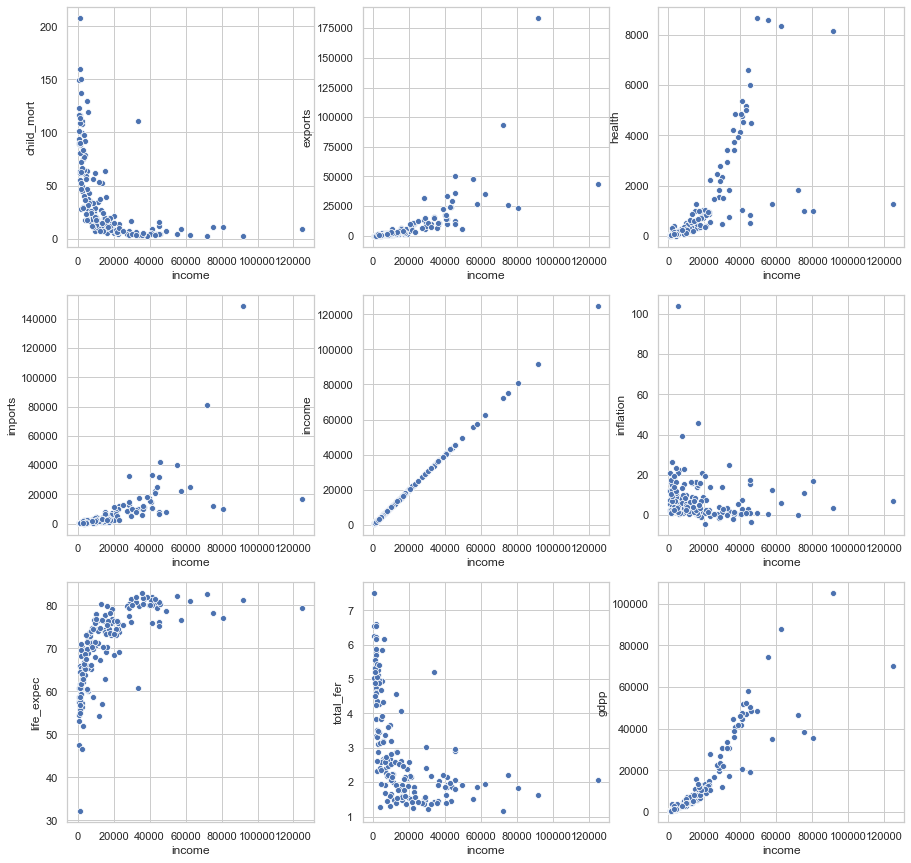

In [11]:
plt.figure(figsize = (15,15))
feature = CountryDf.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.scatterplot(x=CountryDf['income'] ,y=CountryDf[i[1]])

#### Inferences
- With increase in income child mortality decreases.
- With increase in income Export, import, health spending per person , Life expectancy , GDPP increases . 

### 2.4 Plot all values with respect to Health

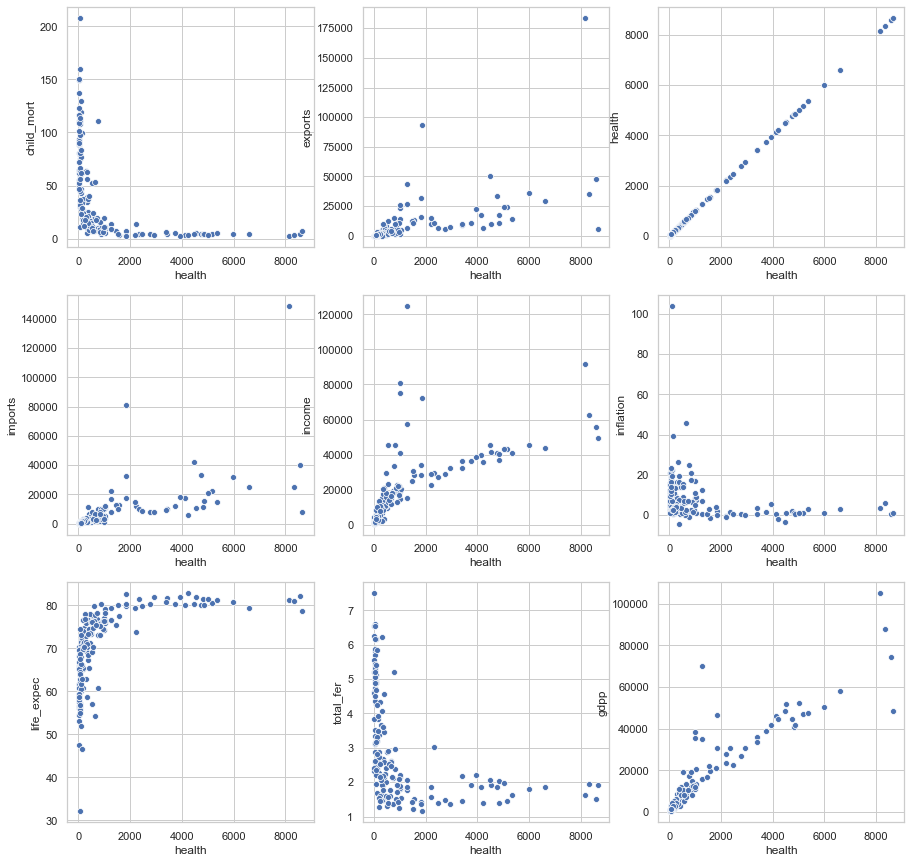

In [12]:
plt.figure(figsize = (15,15))
feature = CountryDf.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.scatterplot(x=CountryDf['health'] ,y=CountryDf[i[1]])

#### Inferences
- Child mortality decreases with increase in spending in health.
- Life expectancy increases with increase in spending in health.
- GDPP also increases with increasing in spending in health .

### 2.5 Plot all values with respect to Inflation

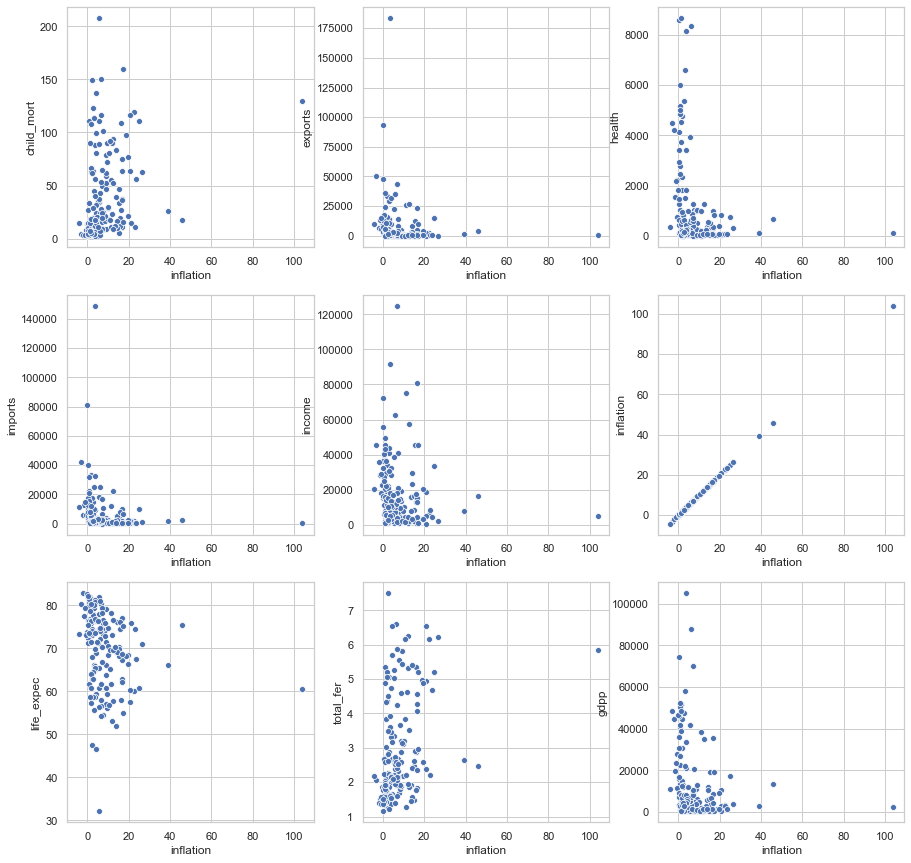

In [13]:
plt.figure(figsize = (15,15))
feature = CountryDf.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.scatterplot(x=CountryDf['inflation'] ,y=CountryDf[i[1]])

#### Inferences
- Couldnt find much distinctive patterns with respect to Inflation


### 2.6 Box plots

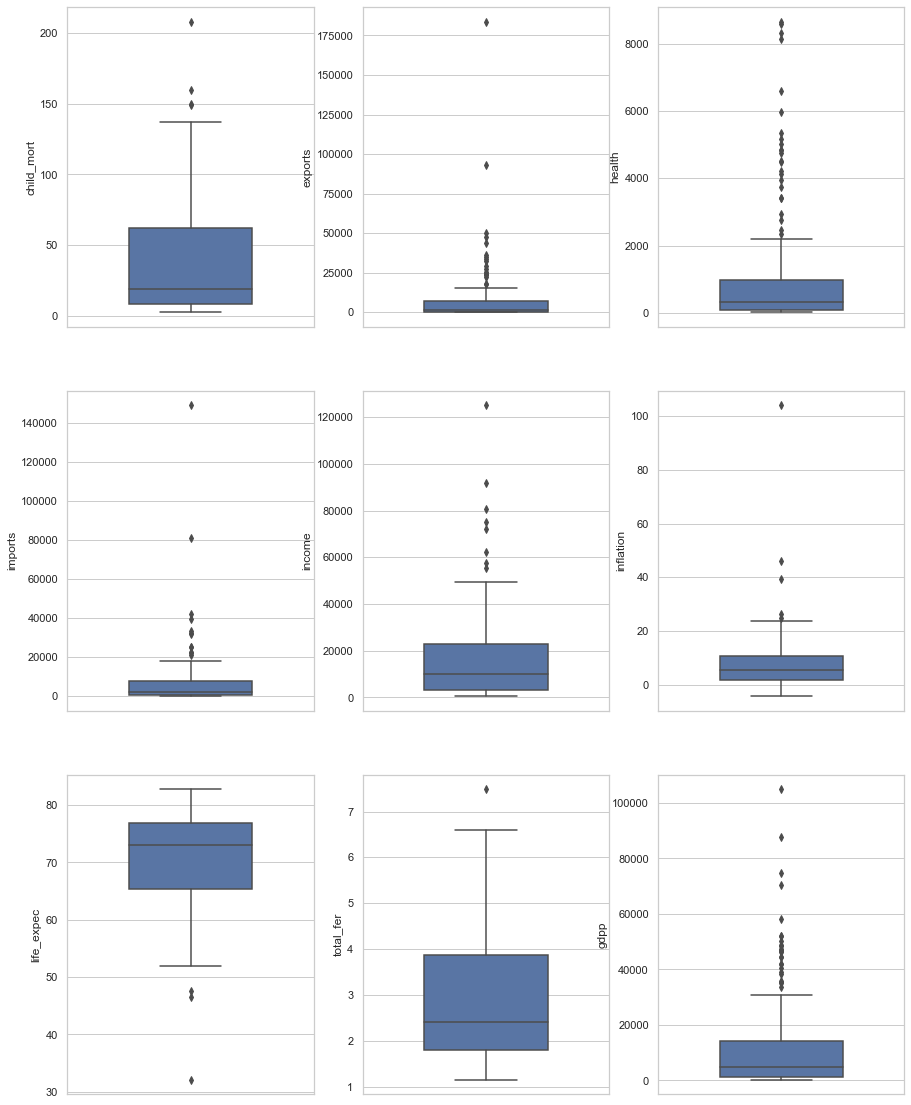

In [14]:
plt.figure(figsize = (15,20))
feature = CountryDf.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(y=CountryDf[i[1]],width=0.5)

## 3. Outlier treatment

From the above box plot we can see that there are outliers for all the variables 

but We will be capping(soft capping -will cap everything to 99% ) the following in the upper range
- Income
- Inflation
- Imports 
- Exports

We will not be capping Life expectancy,GDPP and child mortality rates as those might be the countries which would be in direst need of Aid.

We have very less data hence will not be deleting any outliers.


In [15]:
q4 = CountryDf['income'].quantile(0.99)
CountryDf['income'][CountryDf['income']>= q4] = q4

q4 = CountryDf['inflation'].quantile(0.99)
CountryDf['inflation'][CountryDf['inflation']>= q4] = q4

q4 = CountryDf['imports'].quantile(0.99)
CountryDf['imports'][CountryDf['imports']>= q4] = q4

q4 = CountryDf['exports'].quantile(0.99)
CountryDf['exports'][CountryDf['exports']>= q4] = q4

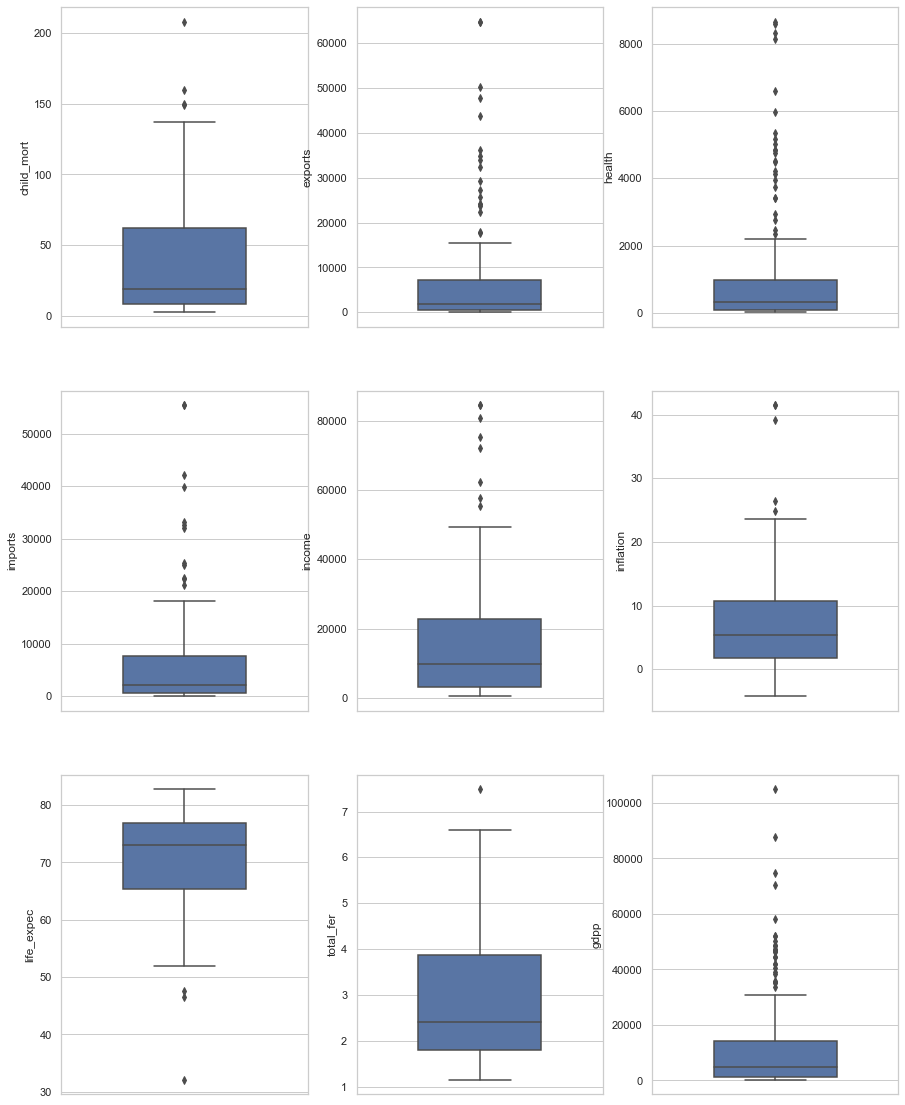

In [16]:
plt.figure(figsize = (15,20))
feature = CountryDf.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(y=CountryDf[i[1]],width=0.5)

The above figure is plotted after capping

## 4. Hopkins statistics

In [17]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
import statistics 
HopScore=[]
for i in range(0,10):
    HopScore.append(hopkins(CountryDf.drop('country', axis = 1)))
    
statistics.mean(HopScore)   ## Avrage needs to be taken 

0.9000565067371008

#### Inferences
- A Hopkins score above 0.7 indicates a clustering tendency at 90% confidence level.
We got hopkins average as 0.91 which indicates the data has high clustering tendensies

## 5.Scaling -Prepare Data for Modeling

In [19]:
from sklearn.preprocessing import StandardScaler ## Scale using standard scalar
scaler = StandardScaler()
df1 = scaler.fit_transform(CountryDf.drop('country', axis = 1))
df1

array([[ 1.29153238, -0.56962212, -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47385792, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.42399973, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.49160668, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.53995007, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.52701632, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [20]:
df1 = pd.DataFrame(df1, columns = CountryDf.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.565040,-0.598741,-0.851668,0.265002,-1.619092,1.902882,-0.679180
1,-0.538949,-0.473858,-0.439218,-0.413584,-0.386946,-0.372075,0.647866,-0.859973,-0.485623
2,-0.272833,-0.424000,-0.484826,-0.476100,-0.221053,1.122161,0.670423,-0.038404,-0.465376
3,2.007808,-0.381249,-0.532363,-0.463973,-0.612045,1.932987,-1.179234,2.128151,-0.516268
4,-0.695634,-0.086742,-0.178771,0.139728,0.125254,-0.764618,0.704258,-0.541946,-0.041817


## 6.Hierarchical Clustering

### 6.1 Single linkage 

In [21]:
# Import the required libraries 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

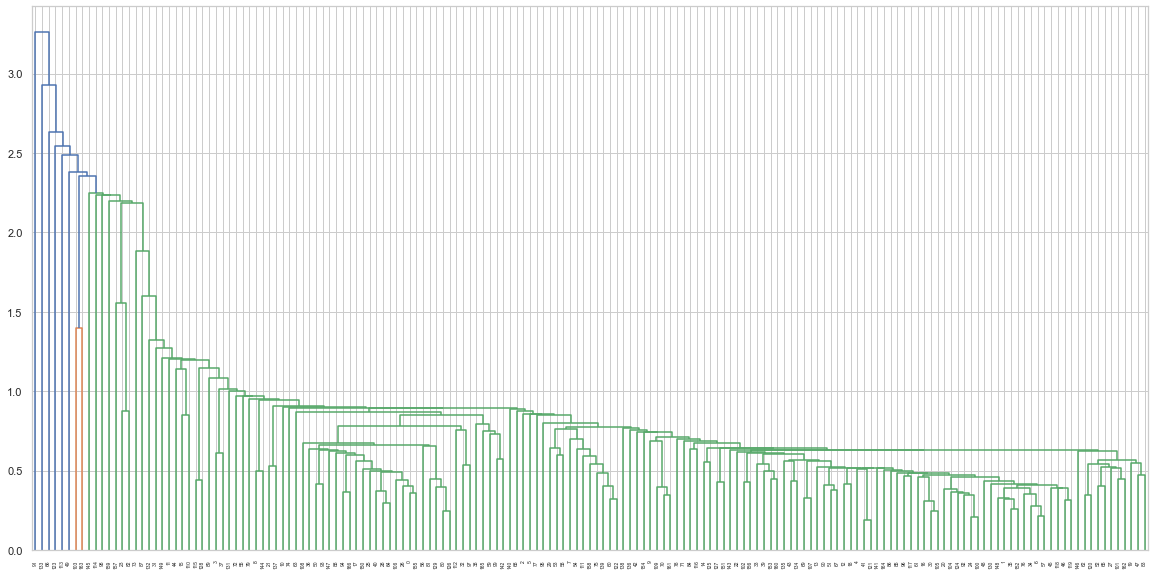

In [22]:
mergings = linkage(df1, method="single", metric='euclidean')
plt.figure(figsize = (20,10))
dendrogram(mergings)
plt.show()

#### Inferences
Cannot find much distinctive clusters hence will try Complete Linkage

### 6.2 complete linkage


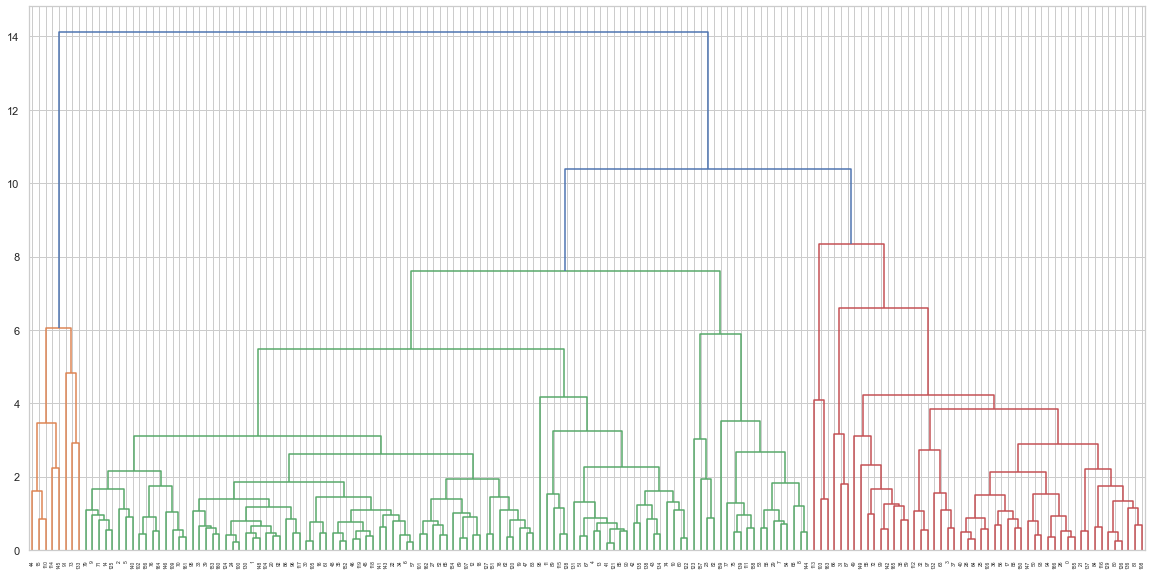

In [23]:
mergings = linkage(df1, method="complete", metric='euclidean')
plt.figure(figsize = (20,10))
dendrogram(mergings)
plt.show()

In [24]:
## Cut the dendrogram at 8 i.e for 4 clusters as we can visualize 4 distinctive clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, ) 
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 3, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 3, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 0])

In [25]:
## Concatinate the cluster_labels
df_Heirarchical = CountryDf.copy()
df_Heirarchical['cluster_labels'] = cluster_labels
df_Heirarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,1


In [26]:
df_Heirarchical.cluster_labels.value_counts()

1    109
0     47
2      8
3      3
Name: cluster_labels, dtype: int64

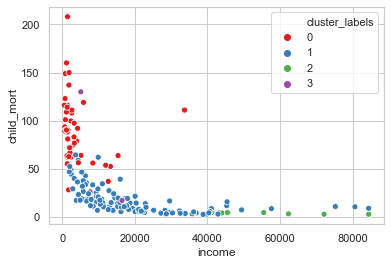

In [27]:
## Plot Income VS Child Mortality
sns.scatterplot(x = 'income', y = 'child_mort',hue='cluster_labels',data = df_Heirarchical,legend='full',palette="Set1")


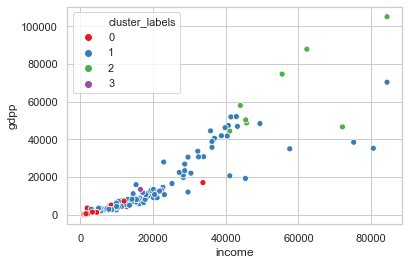

In [28]:
# Plot Income vs GDPP
sns.scatterplot(x = 'income', y = 'gdpp',hue='cluster_labels',data = df_Heirarchical,legend='full',palette="Set1")


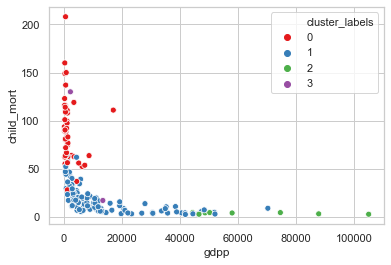

In [29]:
# Plot GDPP Vs Child mortality
sns.scatterplot(x = 'gdpp', y = 'child_mort',hue='cluster_labels',data = df_Heirarchical,legend='full',palette="Set1")

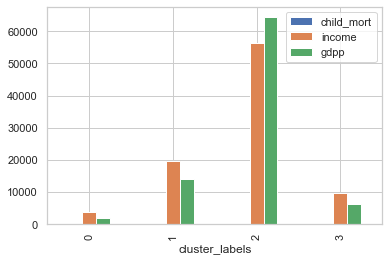

In [30]:
## Cluster profiling in order to view insights
df_Heirarchical.drop(['country', 'exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

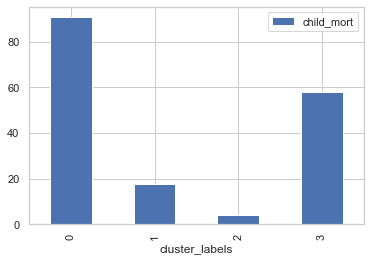

In [31]:
## Plot just the Child mortality 
df_Heirarchical.drop(['country', 'exports','health','imports','inflation','life_expec','total_fer','income','gdpp'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

In [32]:
# Top 5 in direst need , valuse sorted by gdpp, income ascending and child mortality decending
df_Heirarchical[df_Heirarchical['cluster_labels'] == 0].sort_values(by = [ 'gdpp','income','child_mort'], ascending = [True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,0


## 7. K-means Clustering

### 7.1 Silhouette score

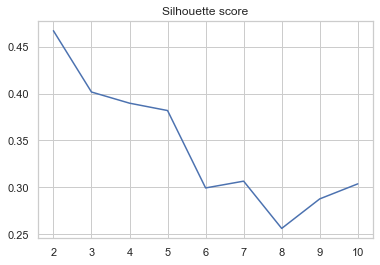

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)
plt.title('Silhouette score')
plt.plot(temp[0], temp[1])

In [34]:
temp

,0,1
0,2,0.466974
1,3,0.401620
2,4,0.389719
3,5,0.381864
4,6,0.299304
5,7,0.306540
6,8,0.256133
7,9,0.287632
8,10,0.303660


### 7.2 Elbow curve

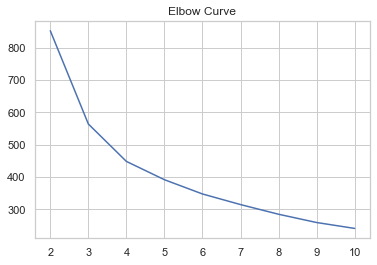

In [35]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.title('Elbow Curve')
plt.plot(temp[0], temp[1])

#### Number of clusters
Statistically 3 clusters are recomended , but it would be too less clusters  hence as per my business understanding we can try 4 - 5 clusters and will take the best results .

### 7.3 K-means with k=4 clusters


In [36]:
kmean = KMeans(n_clusters = 4,random_state = 50).fit(df1)
kmean.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 3, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 2, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [37]:
df_kmean = CountryDf.copy()
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,1
1,0
2,0
3,1
4,0


In [38]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0


In [39]:
df_kmean.label.value_counts()

0    82
1    48
2    28
3     9
Name: label, dtype: int64

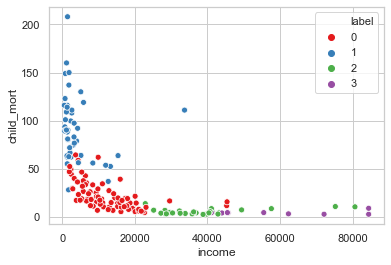

In [40]:
# Plot income vs Child mortality 
sns.scatterplot(x = 'income', y = 'child_mort',hue='label',data = df_kmean,legend='full',palette="Set1")

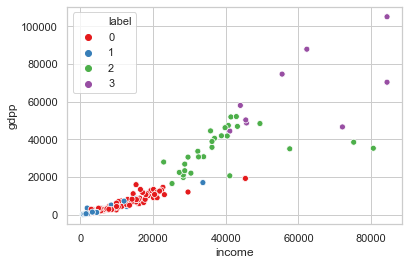

In [41]:
#Plot Income vs GDPP
sns.scatterplot(x = 'income', y = 'gdpp',hue='label',data = df_kmean,legend='full',palette="Set1")

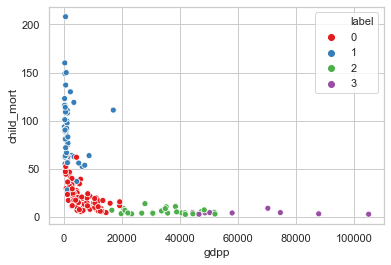

In [42]:
#Plot gdpp Vs Child mortality
sns.scatterplot(x = 'gdpp', y = 'child_mort',hue='label',data = df_kmean,legend='full',palette="Set1")

#### Inferences
- Cluster 1 has low GDPP and high child mortality rate
- Cluster 1 has low gdpp and low income
- Cluster 1 has low income and High child mortality rate

### 7.4 Kmeans with 5 Clusters

In [43]:
kmean1 = KMeans(n_clusters = 5,random_state = 50).fit(df1)
kmean1.labels_

array([0, 1, 1, 4, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 4, 4, 1, 0, 1, 2, 2,
       3, 1, 1, 1, 1, 4, 0, 1, 1, 2, 2, 4, 0, 1, 2, 4, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 4, 3, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 2, 4, 1, 1, 1, 4, 1, 1, 0, 1, 0, 1,
       3, 2, 0, 4, 3, 1, 0, 1, 1, 1, 1, 1, 2, 3, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 2, 2, 0, 0, 2, 2, 1, 1, 4, 1, 2, 3, 1, 0, 1, 4, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 4, 1, 4, 0])

In [44]:
df_kmean1 = CountryDf.copy()
label1  = pd.DataFrame(kmean1.labels_, columns= ['label'])
label1.head()

,label
0,0
1,1
2,1
3,4
4,1


In [45]:
df_kmean1 = pd.concat([df_kmean1, label1], axis =1)
df_kmean1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,4
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,1


In [46]:
df_kmean1.label.value_counts()

1    80
0    36
2    28
4    14
3     9
Name: label, dtype: int64

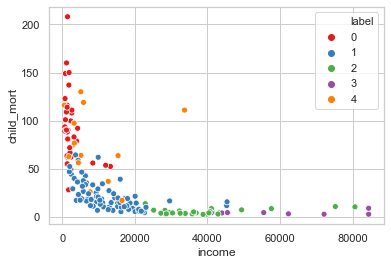

In [47]:
## Plot income vs Child mortality
sns.scatterplot(x = 'income', y = 'child_mort',hue='label',data = df_kmean1,legend='full',palette="Set1")

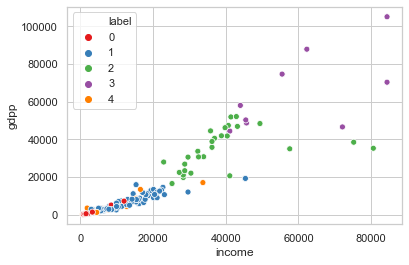

In [48]:
## Plot income vs GDPP
sns.scatterplot(x = 'income', y = 'gdpp',hue='label',data = df_kmean1,legend='full',palette="Set1")

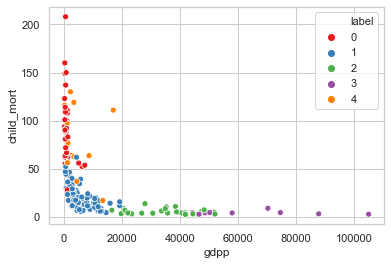

In [49]:
## Plot GDPP vs Child mortality
sns.scatterplot(x = 'gdpp', y = 'child_mort',hue='label',data = df_kmean1,legend='full',palette="Set1")

#### Inferences
The clustering with 5 clusters doesnt seem to be the best cluster as we can see a lot of  data points from cluster 0 and 4 seems to be very near by 
and seems like they should belong to same cluster .
Hence Taking n= 4 and proceeding further

## 8. Cluster Profiling (with n_clusters =4)

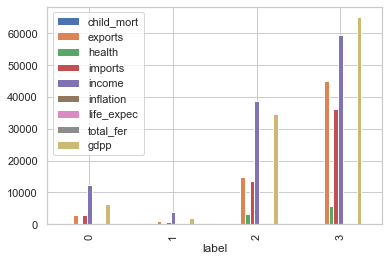

In [50]:
df_kmean.drop('country', axis = 1).groupby('label').mean().plot(kind = 'bar')

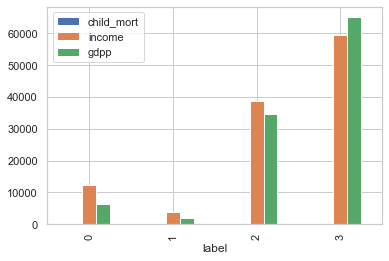

In [51]:
df_kmean.drop(['country', 'exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')

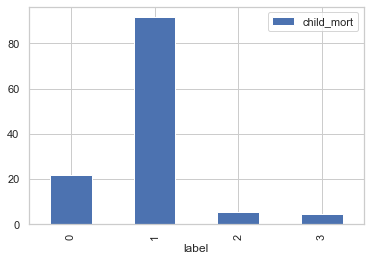

In [52]:
df_kmean.drop(['country', 'exports','health','imports','inflation','life_expec','total_fer','income','gdpp'], axis = 1).groupby('label').mean().plot(kind = 'bar')

#### Inferences
- The Cluster 1 has low GDPP and high child mortality rate
- Cluster 1 has low GDPP and low income
- Cluster 1 has low income and High child mortality rate.
- Hence Cluster 1 is in direst need of Aid


In [53]:
df_kmean[df_kmean['label'] == 1].sort_values(by = [ 'gdpp','income','child_mort'], ascending = [True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,1
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,1


## 9. Conclusion

On the basis of K-means clustering technique the clusters were formed.
We have taken the following 3 features as the important socio economic factors for our strategic decisions.
	- GDPP
	- Income
	- Child Mortality
The following are the top 5 countries which are in direst need of Aid(arranged on the basis of low GDPP, Low income and high child mortality).
- Burundi
- Liberia
- Congo
- Niger
- Sierra leone